In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.preprocessing import StandardScaler

data = pd.read_pickle("data/main.df")
data = data.sample(frac=1).reset_index(drop=True)
# One hot encode position - according to what they can play
data["F_pos"] = data["Pos"].apply(lambda x: "F" in x)
data["C_pos"] = data["Pos"].apply(lambda x: "C" in x)
data["G_pos"] = data["Pos"].apply(lambda x: "F" in x)
data = data.drop("Pos", axis=1)

# Address missing values
na_zero_cols = ["TS%", "3P%", "3PAr", "FTr", "TOV%", "FG%", "2P%", "eFG%", "FT%"]
for c in na_zero_cols: data[c].fillna(0, inplace=True)

In [10]:
# Add some per game features here
# pg_features = ["MP", "3P", "3PA", "2P", "2PA", "FT", "FTA", "ORB", "DRB",'TRB','AST','STL','BLK','TOV','PF','PTS']
# for feature in pg_features:
#     data[feature] = data.apply(lambda x: x[feature]/x["G"], axis=1)

In [11]:
target = "salary"
x_cols = ["Age", "G", "GS", "MP", "PER", "TS%", '3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%',
          'TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP','FG','FGA','FG%','3P','3PA','3P%',
          '2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','age',
          'ows_48','dws_48','shot','team_mar','team_mp','team_gm','year_3par','team_ts','tm_usg','tm_ts_w_o_plyr',
          'reb_vers','defense','val_shot','offense','mpg_int','raw_spm','raw_contrib','tm_sum','tm_adj','bpm_2',
          'stderr','contrib','vorp_2','reb_vers_2','val_shot_2','offense_2','defense_2','raw_obpm','contrib_2',
          'tm_ortg','tm_sum_2','tm_adj_2','tm_drtg','obpm_2','ostderr','ocontrib','ovorp','dbpm_2','dstderr',
          'dcontrib','dvorp','sum_spm','bpm_3','contrib_3','vorp_3','vorp_gm','o_bpm','ocontrib_2','ovorp_2',
          'ovorp_gm','d_bpm','dcontrib_2','dvorp_2','dvorp_gm','exp_bpm','truetalentbpm',
          'exp_min','truetalentvorp','truetimevorp','worp','o_worp','d_worp','height','weight',
          'adjusted_worp','estimated_position','bbref_pos','age_on_feb_1','yrs_experience', 
          "F_pos", "G_pos", "C_pos"] #+ pg_features
# Scale the columns - not including binary columns 
scale_cols = [col for col in x_cols if col not in ["F_pos", "G_pos", "C_pos"]]
scaler = StandardScaler()
data[x_cols] = scaler.fit_transform(data[x_cols])
X, Y = data[x_cols], data[target]

In [25]:
N = len(x_cols)
model = Sequential()
model.add(Dense(N, input_dim=N, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(int(np.sqrt(N)), kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X, Y, validation_split=0.2, epochs=350, batch_size=120, verbose=3)

Train on 7068 samples, validate on 1768 samples
Epoch 1/350
Epoch 2/350
Epoch 3/350
Epoch 4/350
Epoch 5/350
Epoch 6/350
Epoch 7/350
Epoch 8/350
Epoch 9/350
Epoch 10/350
Epoch 11/350
Epoch 12/350
Epoch 13/350
Epoch 14/350
Epoch 15/350
Epoch 16/350
Epoch 17/350
Epoch 18/350
Epoch 19/350
Epoch 20/350
Epoch 21/350
Epoch 22/350
Epoch 23/350
Epoch 24/350
Epoch 25/350
Epoch 26/350
Epoch 27/350
Epoch 28/350
Epoch 29/350
Epoch 30/350
Epoch 31/350
Epoch 32/350
Epoch 33/350
Epoch 34/350
Epoch 35/350
Epoch 36/350
Epoch 37/350
Epoch 38/350
Epoch 39/350
Epoch 40/350
Epoch 41/350
Epoch 42/350
Epoch 43/350
Epoch 44/350
Epoch 45/350
Epoch 46/350
Epoch 47/350
Epoch 48/350
Epoch 49/350
Epoch 50/350
Epoch 51/350
Epoch 52/350
Epoch 53/350
Epoch 54/350
Epoch 55/350
Epoch 56/350
Epoch 57/350
Epoch 58/350
Epoch 59/350
Epoch 60/350
Epoch 61/350
Epoch 62/350
Epoch 63/350
Epoch 64/350
Epoch 65/350
Epoch 66/350
Epoch 67/350
Epoch 68/350
Epoch 69/350
Epoch 70/350
Epoch 71/350
Epoch 72/350
Epoch 73/350
Epoch 74/350

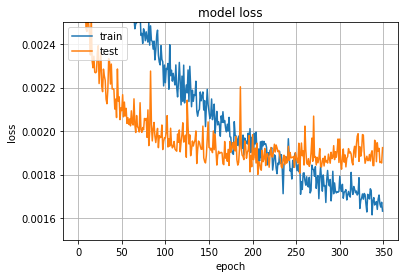

In [26]:
# plot the results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.0015,0.0025)
plt.grid()
plt.show()